In [6]:
library('zoo')
library('ggplot2')


Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



In [7]:
aapl <- read.zoo("../data/0933OS_Code/Chapter 1/aapl.csv", sep=",", header=TRUE, format="%Y-%m-%d")

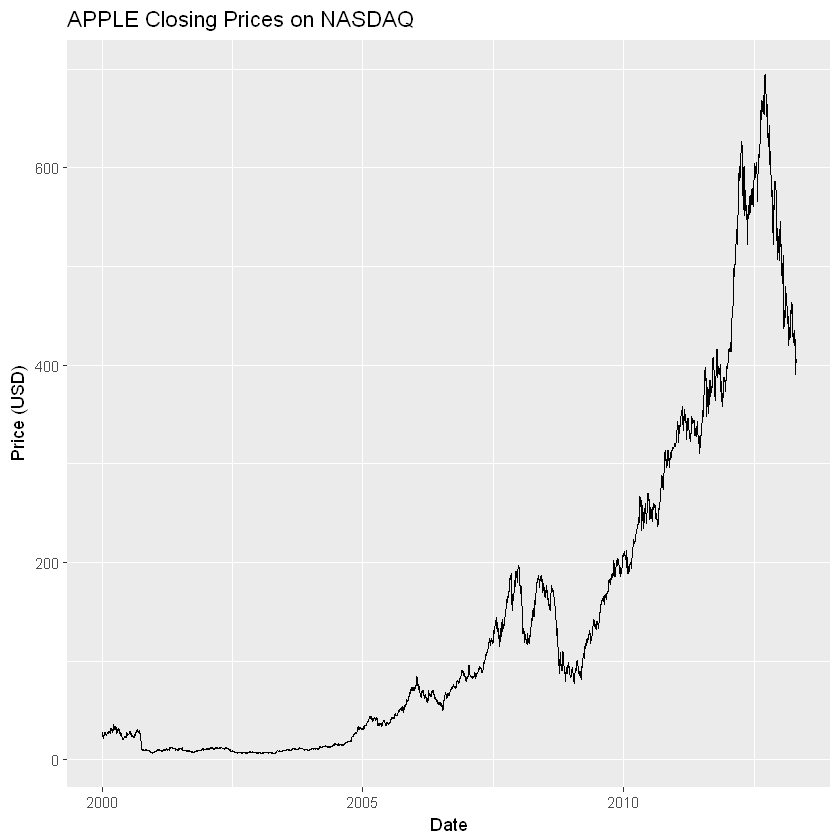

In [8]:
ggplot(aes(x=Index, y=Value), data=fortify(aapl, melt=TRUE)) +
    geom_line() +
    labs(title='APPLE Closing Prices on NASDAQ', x='Date', y='Price (USD)')

In [9]:
head(aapl)

2000-01-03 2000-01-04 2000-01-05 2000-01-06 2000-01-07 2000-01-10 
     27.58      25.25      25.62      23.40      24.51      24.08 

In [10]:
tail(aapl)

2013-04-17 2013-04-18 2013-04-19 2013-04-22 2013-04-23 2013-04-24 
    402.80     392.05     390.53     398.67     406.13     405.46 

In [11]:
aapl[which.max(aapl)]

2012-09-19 
    694.86 

In [12]:
ret_simple <- diff(aapl) / lag(aapl, k=-1) * 100
ret_cont <- diff(log(aapl)) * 100

In [13]:
summary(coredata(ret_simple))

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-51.85888  -1.32475   0.07901   0.12527   1.55332  13.91131 

In [14]:
ret_simple[which.min(ret_simple)]

2000-09-29 
 -51.85888 

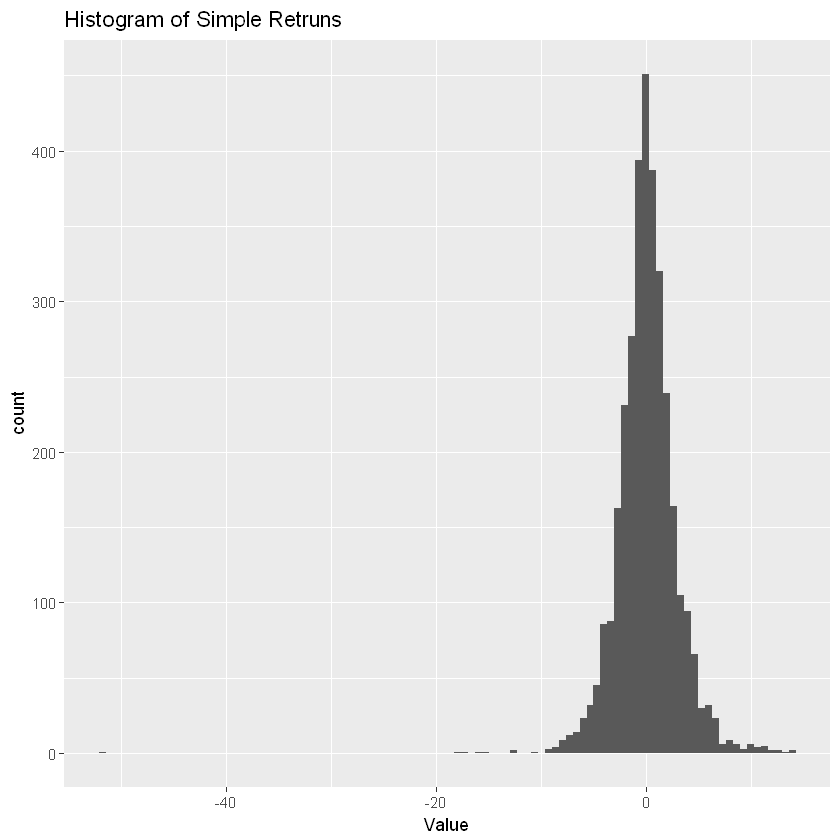

In [15]:
ggplot(aes(x=Value), data=fortify(ret_simple, melt=TRUE)) +
    geom_histogram(bins=100) +
    labs(title="Histogram of Simple Retruns", xlab="%")

In [16]:
aapl_2013 <- window(aapl, start='2013-01-01', end='2013-12-31')
aapl_2013[which.max(aapl_2013)]

2013-01-02 
    545.85 

In [17]:
quantile(ret_simple, probs=0.01)

1% 
-7.042678